In [1]:
# See last trial for latest results and optimization notes.
# Need 93% accuracy

# Setting up Fashion_MNST
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.utils import to_categorical
import time

# For examining results
from sklearn.metrics import confusion_matrix
import seaborn as sn

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

Using TensorFlow backend.


In [2]:
conv_training_data = training_images.reshape(60000, 28, 28, 1)
conv_test_data = test_images.reshape(10000, 28, 28, 1)

In [12]:
#Note: 2nd Plot History adds name, which we need to evaluate optimizer names

# def plot_training_history2(history, model, name, time):
#     figure = plt.figure()
#     figure.suptitle(name)
#     plt.subplot(1, 2, 1)
#     plt.plot(history.history['acc'])
#     plt.plot(history.history['val_acc'])
#     plt.title('model accuracy')
#     plt.ylabel('accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['training', 'validation'], loc='best')
#     plt.tight_layout()

#     plt.subplot(1, 2, 2)
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['training', 'validation'], loc='best')
#     plt.tight_layout()

#     figure.tight_layout()
#     plt.show()
    
#     loss, accuracy  = model.evaluate(conv_training_data, test_labels, verbose=False)
#     print(f'Trained in {time} seconds')
#     print(f'Test loss: {loss:.3}')
#     print(f'Test accuracy: {accuracy:.3}')
    
    
def plot_training_history(history, model, eval_images=False):
    figure = plt.figure()

    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()
    
    if eval_images:
        loss, accuracy  = model.evaluate(conv_test_data, test_labels, verbose=False)
    else:
        loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
        
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [ ]:
#####See next Cell. We need to complete building functions that the Optimizer needs, and the make sure the 'History'parameter matches.

# Best CNN model reached 0.905 w/ 30 sec run time.
# used best model w/ 3rd CNN filter, didnt work.
# Tried more epochs didnt work.
# stride instead of maxpool didnt work.
###test all optimizers and loss next.
#####then, optimize ANN head.
#######finally, data augmentation

#Trying optimizer optimization (need to copy old code)
####Get naming framework from n_n_v6_req (runcodecalls variables)

model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, kernel_size=(3, 3), strides=(2,2), activation='relu', padding='same'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(126, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))



In [13]:
# Best CNN model reached 0.905 w/ 30 sec run time.
# used best model w/ 3rd CNN filter, didnt work.
# Tried more epochs didnt work.
# stride instead of maxpool didnt work.
###test all optimizers and loss next.
#####then, optimize ANN head.
#######finally, data augmentation

#Trying optimizer optimization (need to copy old code)
####Get naming framework from n_n_v6_req (runcodecalls variables)

def CNN_BaseModel_Optimizer():
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #model.add(Conv2D(64, kernel_size=(3, 3), strides=(2,2), activation='relu', padding='same'))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(126, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))
    
    #note that the class 'model' changes with each cell.
    return model

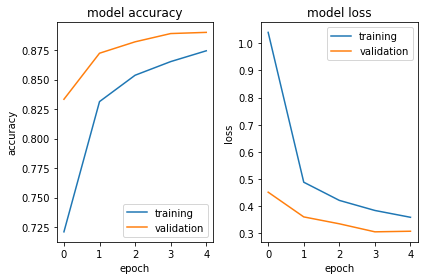

Test loss: 0.332
Test accuracy: 0.879


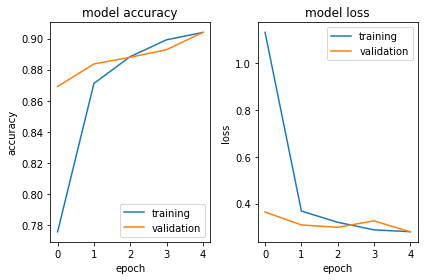

Test loss: 0.318
Test accuracy: 0.895


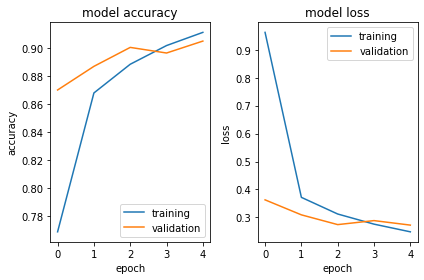

Test loss: 0.298
Test accuracy: 0.895


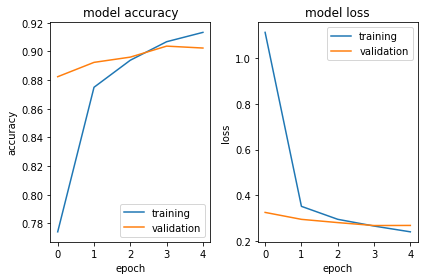

Test loss: 0.274
Test accuracy: 0.904


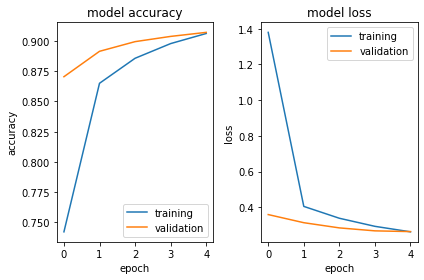

Test loss: 0.278
Test accuracy: 0.903


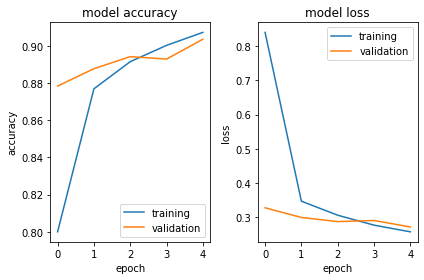

Test loss: 0.29
Test accuracy: 0.899


In [15]:
optimizers = [
    'sgd',
    'rmsprop',
    'adadelta',
    'adam',
    'adamax',
    'nadam'
]

# So we can plot them on one chart
histories = []

for optimizer in optimizers:
    model = CNN_BaseModel_Optimizer()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=5, verbose=False, validation_split=.1)
    plot_training_history(history, model, eval_images=True)
    
    #start = time.process_time()
    #conv_training_data, training_labels
    #history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=5, verbose=False, validation_split=.1)
    #history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=5, verbose=False, validation_split=.1)
    #stop = time.process_time()
    #plot_training_history2(history, model, optimizer, stop - start)
    #histories.append(history)

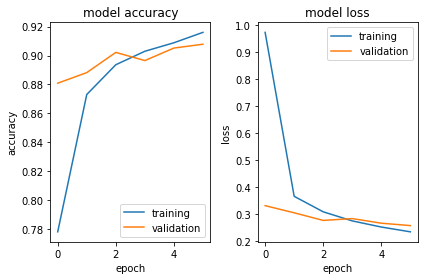

Test loss: 0.285
Test accuracy: 0.902


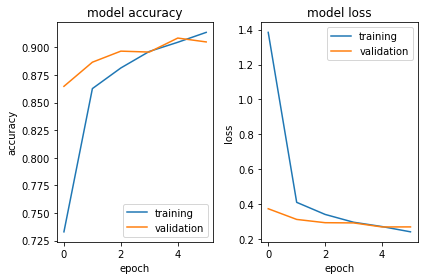

Test loss: 0.279
Test accuracy: 0.902


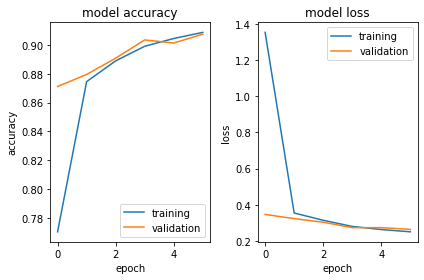

Test loss: 0.297
Test accuracy: 0.902


In [16]:
# Try the following with more epochs:
# 'adam',
# 'adamax',
# 'nadam'

optimizers = [
    'adam',
    'adamax',
    'nadam'
]

# So we can plot them on one chart
histories = []

for optimizer in optimizers:
    model = CNN_BaseModel_Optimizer()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=6, verbose=False, validation_split=.1)
    plot_training_history(history, model, eval_images=True)


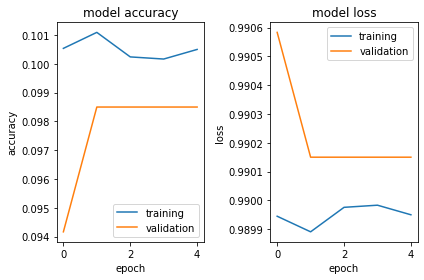

Test loss: 0.99
Test accuracy: 0.1


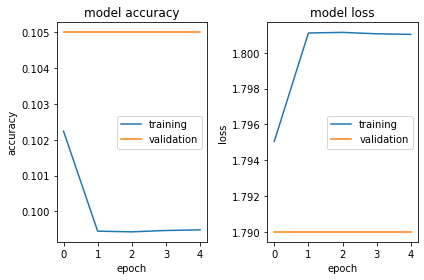

Test loss: 1.8
Test accuracy: 0.1


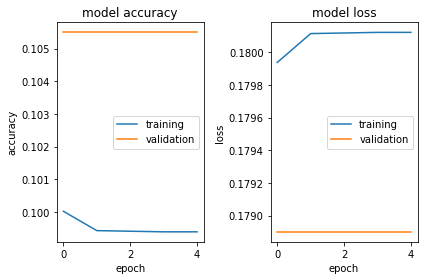

Test loss: 0.18
Test accuracy: 0.1


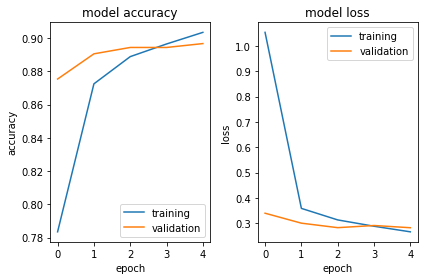

Test loss: 0.306
Test accuracy: 0.892


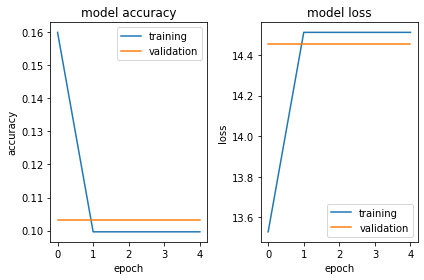

Test loss: 14.5
Test accuracy: 0.1


In [18]:
#Chose 'nadam' as optimizer,based on not over-fitting
# Try different loss optimizers
###Somethings not working - the last result should have been "categorical_crossentropy"

loss_functions = [
    'hinge',
    'categorical_hinge',
    'mean_squared_error',
    'kullback_leibler_divergence',
    'categorical_crossentropy'
]

histories = []

for loss_function in loss_functions:
    model = CNN_BaseModel_Optimizer()
    model.compile(optimizer="nadam", loss=loss_function, metrics=['accuracy'])
    history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=5, verbose=False, validation_split=.1)
    plot_training_history(history, model, eval_images=True)
    
#     model = nick_model_ReLU_loss()
#     model.compile(optimizer="sgd", loss=loss_function, metrics=['accuracy'])
#     history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
#     plot_training_history(history, model, loss_function, start - stop)
#     histories.append(history)

In [ ]:
###Note - code taken from CNN - we need the code that includes 'history' for the Optimizers.

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=5, verbose=True, validation_split=.1)

plot_training_history(history, model, eval_images=True)